# Introduction to the xgbsurv package - AH

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

Values are being sorted!
Values are being sorted!


## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="ah_objective",
                                             eval_metric="ah_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function ah_likelihood at 0x2b79fd260>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function ah_objective at 0x2b79fd4e0>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-ah_likelihood:2570.00342
[1]	validation_0-ah_likelihood:2565.68600
[2]	validation_0-ah_likelihood:2560.20158
[3]	validation_0-ah_likelihood:2555.41937
[4]	validation_0-ah_likelihood:2549.67519
[5]	validation_0-ah_likelihood:2541.89742
[6]	validation_0-ah_likelihood:2534.34041
[7]	validation_0-ah_likelihood:2527.35089
[8]	validation_0-ah_likelihood:2519.29435
[9]	validation_0-ah_likelihood:2507.68747
[10]	validation_0-ah_likelihood:2503.11686
[11]	validation_0-ah_likelihood:2492.07667
[12]	validation_0-ah_likelihood:2483.61760
[13]	validation_0-ah_likelihood:2466.56222
[14]	validation_0-ah_likelihood:2444.26127
[15]	validation_0-ah_likelihood:2430.26666
[16]	validation_0-ah_likelihood:2410.56677
[17]	validation_0-ah_likelihood:2404.45566
[18]	validation_0-ah_likelihood:2396.03042
[19]	validation_0-ah_likelihood:2379.58584
[20]	validation_0-ah_likelihood:2371.79053
[21]	validation_0-ah_likelihood:2362.06281
[22]	validation_0-ah_likelihood:2352.89385
[23]	validation_0-ah_

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function ah_likelihood at 0x2b79fd260>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function ah_objective at 0x2b79fd4e0>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

integration values 63701


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
285.433319,1.153169,0.849017,1.513357,1.599026,0.624970,0.946314,1.682381,1.197074,1.560268,1.502320,...,1.225361,1.628571,1.559971,1.683851,1.535468,1.621795,0.815585,1.684179,0.519078,1.656341
286.066681,1.157804,0.849024,1.514464,1.600791,0.624971,0.946338,1.685790,1.197246,1.565855,1.503411,...,1.225569,1.630532,1.561424,1.687474,1.536736,1.626845,0.815592,1.687886,0.519078,1.661030
297.233337,1.241708,0.849140,1.531930,1.629329,0.624975,0.946669,1.742483,1.199857,1.663001,1.519851,...,1.228727,1.664989,1.584132,1.747229,1.556445,1.716172,0.815669,1.749050,0.519078,1.742174


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

integration values 63701


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
285.433319,0.315635,0.427835,0.220170,0.202093,0.535277,0.388169,0.185931,0.302077,0.210080,0.222613,...,0.293652,0.196210,0.210142,0.185658,0.215355,0.197544,0.442380,0.185597,0.595069,0.190836
286.066681,0.314175,0.427832,0.219926,0.201737,0.535277,0.388160,0.185298,0.302025,0.208909,0.222370,...,0.293591,0.195825,0.209837,0.184986,0.215082,0.196549,0.442378,0.184910,0.595069,0.189943
297.233337,0.288890,0.427783,0.216118,0.196061,0.535275,0.388031,0.175085,0.301237,0.189569,0.218745,...,0.292665,0.189193,0.205126,0.174256,0.210884,0.179753,0.442343,0.173939,0.595069,0.175139


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard AH')

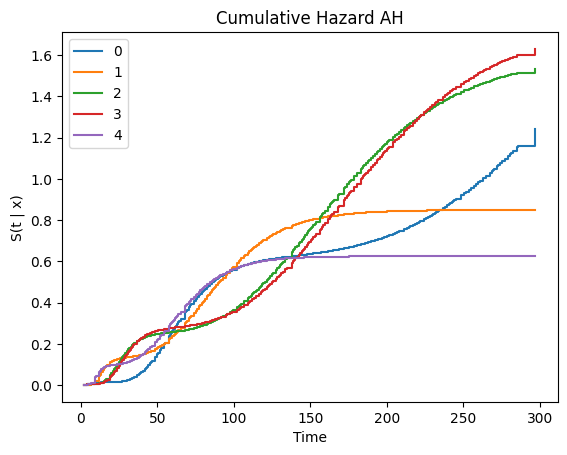

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard AH")

Text(0.5, 1.0, 'Survival Curve AH')

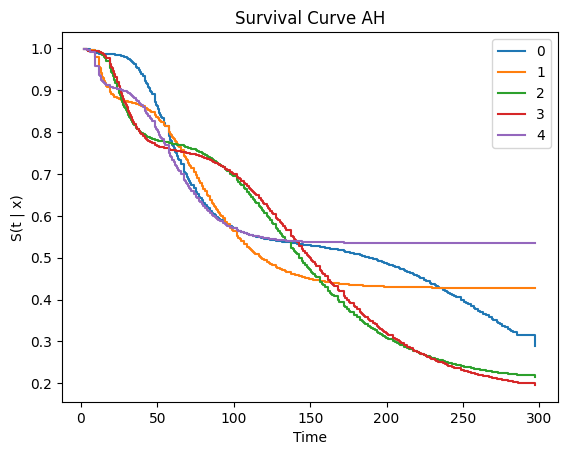

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve AH")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.4967258402823963


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.1970837596439121
